# Correlation analysis
In this practice, I´ll analyze the California Housing Prices dataset to explore the relationships between various socio-economic and geographic features and the median house value. Using correlation analysis and linear regression techniques.


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [40]:
# Dataset information
df.info()

# Descriptive Stadistic 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [42]:
# Check for missing values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

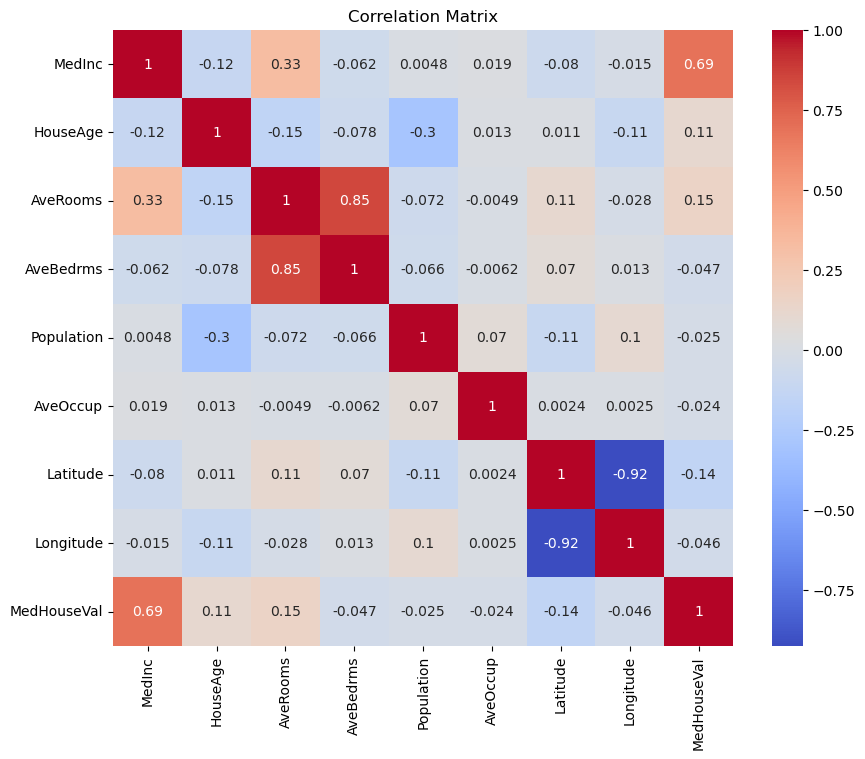

In [44]:
# Correlation matrix with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [46]:
# Correlation of each feature with the target
correlations = df.corr()["MedHouseVal"].sort_values(ascending=False)
print(correlations)


MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


### Linear Regression Model:

In [29]:
# Define features and target variable
features = ["MedInc", "AveRooms", "HouseAge", "AveOccup", "Population", "Latitude", "Longitude"]
X = df[features]
y = df["MedHouseVal"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Coefficients:", list(zip(features, model.coef_)))
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))

# Calculate RMSE (Root Mean Squared Error) manually
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


Coefficients: [('MedInc', 0.3719391314137041), ('AveRooms', 0.019116426934271676), ('HouseAge', 0.00979245076178532), ('AveOccup', -0.003237334088017526), ('Population', -2.9069585343345602e-06), ('Latitude', -0.457872367586263), ('Longitude', -0.46457165288020363)]
Intercept: -38.97586159513934
R² Score: 0.5823239094526445
RMSE: 0.7398151789804084


### Data Visualization 
This graph shows the residuals (the difference between the actual values and the predictions). It helps us to see if there is any pattern in the prediction errors, which would indicate that the model is not capturing some important aspect.

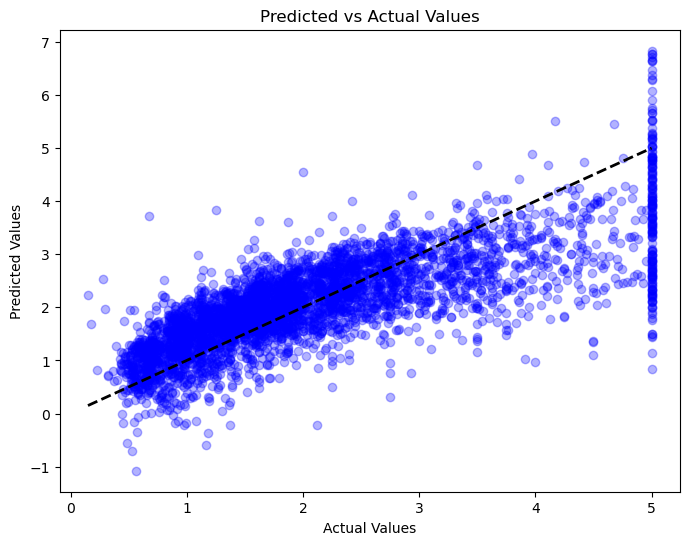

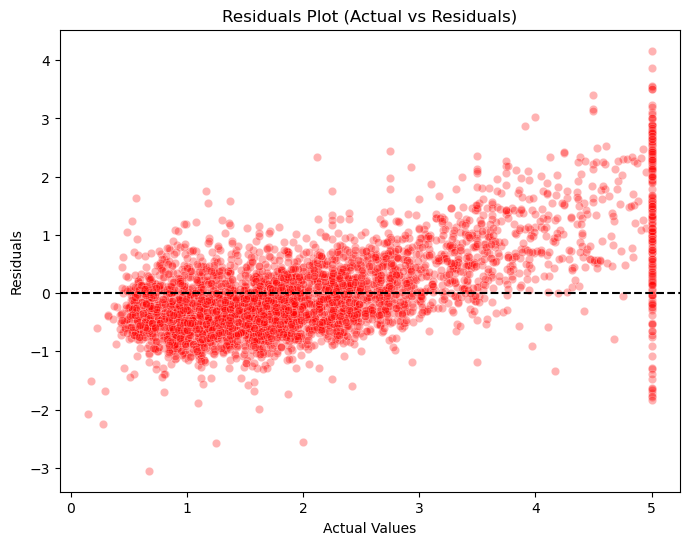

In [31]:
# 1. Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# 2. Residuals Plot
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=residuals, alpha=0.3, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Actual vs Residuals)')
plt.show()


## Conclusion
The analysis conducted using the multiple linear regression model to predict housing prices in California has revealed several key relationships between housing characteristics and their prices. In particular, it was found that median income (MedInc) is one of the most influential variables, reflecting that areas with higher income tend to have higher housing prices. Additionally, geographic location (latitude and longitude) also has a significant impact, with homes located in certain areas having lower prices, likely due to proximity to urban centers and amenities.

The R² of 0.58 indicates that the model explains 58% of the variability in housing prices, which is a good starting point but also suggests that there are factors not captured by the model that could improve prediction accuracy. On the other hand, the RMSE of 0.74 indicates that the model has relatively low error in its predictions, suggesting that, in general, the predicted prices are fairly close to the actual values.